# Introductory Examples

## Contents

- [Introductory Examples](#Introductory-Examples)  
  - [Overview](#Overview)  
  - [Example: Plotting a White Noise Process](#Example:-Plotting-a-White-Noise-Process)  
  - [Example: Variations on Fixed Points](#Example:-Variations-on-Fixed-Points)  
 
 
**This is lecture is a slightly modified version of https://lectures.quantecon.org/jl/julia_by_example.html**
**Thank you to the amazing Quantecon.org team!**

### Level

We are now ready to start learning Julia!

Our approach is aimed at those who already have at least some knowledge of programming — perhaps experience with Python, MATLAB, Fortran, C or similar

In particular, we assume you have some familiarity with fundamental programming concepts such as

- variables  
- arrays or vectors  
- loops  
- conditionals (if/else)  

### Approach

In this lecture we will write and then pick apart small Julia programs

At this stage the objective is to introduce you to basic syntax and data structures

Deeper concepts—how things work—will be covered in later lectures

Since we are looking for simplicity the examples are a little contrived

In this lecture, we will often start with a direct MATLAB/FORTRAN approach which often is **poor coding style** in Julia, but then move towards more **elegant code** which is tightly connected to the mathematics

### Set Up

We assume that you’ve worked your way through [our getting started lecture](https://lectures.quantecon.org/jl/getting_started.html#) already

In particular, the easiest way to install and precompile all the Julia packages used in QuantEcon
notes is to type `] add InstantiateFromURL` and then work in a Jupyter notebook, as described [here](https://lectures.quantecon.org/jl/getting_started.html#jl-jupyter)

### Other References

The definitive reference is [Julia’s own documentation](https://docs.julialang.org/en/v1/)

The manual is thoughtfully written but is also quite dense (and somewhat evangelical)

The presentation in this and our remaining lectures is more of a tutorial style based around examples

## Example: Plotting a White Noise Process

To begin, let’s suppose that we want to simulate and plot the white noise
process $ \epsilon_0, \epsilon_1, \ldots, \epsilon_T $, where each draw $ \epsilon_t $ is independent standard normal

### Introduction to Packages

The first step is to activate a project environment, which is encapsulated by `Project.toml` and `Manifest.toml` files

There are three ways to install packages and versions (where the first two methods are discouraged, since they may lead to package versions out-of-sync with the notes)

1. `add` the packages directly into your global installation (e.g. `Pkg.add("MyPackage")` or `] add MyPackage`)  
1. download an `Project.toml` and `Manifest.toml` file in the same directory as the notebook (i.e. from the `@__DIR__` argument), and then call `using Pkg; Pkg.activate(@__DIR__);`  
1. use the `InstantiateFromURL` package  

In [1]:
using InstantiateFromURL

# activate the QuantEcon environment
activate_github("QuantEcon/QuantEconLecturePackages", tag = "v0.9.5");

If you have never run this code on a particular computer, it is likely to take a long time as it downloads, installs, and compiles all dependent packages

This code will download and install project files from GitHub, [QuantEcon/QuantEconLecturePackages](https://github.com/QuantEcon/QuantEconLecturePackages/)

We will discuss it more in [Tools and Editors](https://lectures.quantecon.org/jl/tools_editors.html#tools-editors), but these files provide a listing of packages and versions used by the code

This ensures that an environment for running code is **reproducible**, so that anyone can replicate the precise set of package and versions used in construction

The careful selection of package versions is crucial for reproducibility, as otherwise your code can be broken by changes to packages out of your control

After the installation and activation, `using` provides a way to say that a particular code or notebook will use the package

In [2]:
using LinearAlgebra, Statistics, Compat

### Using Functions from a Package

Some functions are built into the base Julia, such as `randn`, which returns a single draw from a normal distibution with mean 0 and variance 1 if given no parameters

In [3]:
randn()

-0.4931645304850807

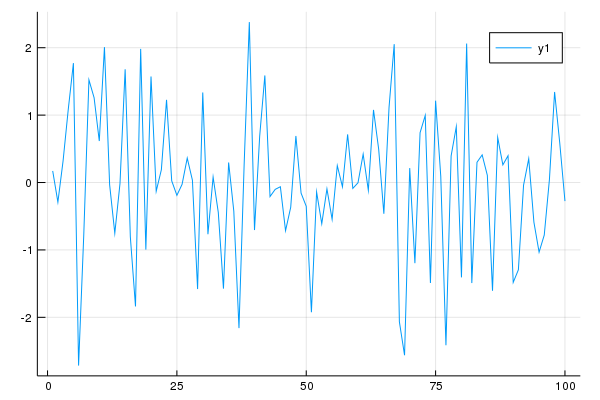

In [4]:
# Other functions require importing all of the names from an external library
using Plots
gr(fmt=:png); # setting for easier display in jupyter notebooks

n = 100
ϵ = randn(n)
plot(1:n, ϵ)

Let’s break this down and see how it works:

* The effect of the statement `using Plots` is to make all the names exported by the `Plots` module available
* Because we used `Pkg.activate` previously, it will use whatever version of `Plots.jl` that was specified in the `Project.toml` and `Manifest.toml` files
* The other packages `LinearAlgebra` and `Statistics` are base Julia libraries, but require an explicit using
* The arguments to `plot` are the numbers `1,2, ..., n` for the x-axis, a vector `ϵ` for the y-axis, and (optional) settings
* The function `randn(n)` returns a column vector `n` random draws from a normal distribution with mean 0 and variance 1

### Arrays

As a language intended for mathematical and scientific computing, Julia has
strong support for using unicode characters

In the above case, the `ϵ` and many other symbols can be typed in most Julia editor by providing the LaTeX and `<TAB>`, i.e. `\epsilon<TAB>`

The return type is one of the most fundamental Julia data types: an array

In [5]:
typeof(ϵ)

Array{Float64,1}

In [6]:
ϵ[1:5]

5-element Array{Float64,1}:
  0.17172160948456994
 -0.29102619849805456
  0.31785370599904   
  1.0812736245700276 
  1.7715337743696862 

The information from `typeof()` tells us that `ϵ` is an array of 64 bit floating point values, of dimension 1

In Julia, one-dimensional arrays are interpreted as column vectors for purposes of linear algebra

The `ϵ[1:5]` returns an array of the first 5 elements of `ϵ`

Notice from the above that

- array indices start at 1 (like MATLAB and Fortran, but unlike Python and C)  
- array elements are referenced using square brackets (unlike MATLAB and Fortran)  


To get **help and examples** in Jupyter or other julia editor, use the `?` before a function name or syntax

```julia
?typeof

search: typeof typejoin TypeError

Get the concrete type of x.

Examples

julia> a = 1//2;

julia> typeof(a)
Rational{Int64}

julia> M = [1 2; 3.5 4];

julia> typeof(M)
Array{Float64,2}
```


### For Loops

Although there’s no need in terms of what we wanted to achieve with our
program, for the sake of learning syntax let’s rewrite our program to use a
`for` loop for generating the data

>**Note**
>
>In the current version of Julia v1.0, the rules for variables accessed in `for` and `while` loops can be sensitive to how they are used (and variables can sometimes require a `global` as part of the declaration).  We strongly advise you to avoid top level (i.e. in the REPL or outside of functions) `for` and `while` loops outside of Jupyter notebooks.  This issue does not apply when used within functions

Starting with the most direct version, and pretending we are in a world where `randn` can only return a single value

In [7]:
# poor style
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

* Here we first declared `ϵ` to be a vector of `n` numbers, initialized by the floating point `0.0`
* The `for` loop then populates this array by successive calls to `randn()`
* Like all code blocks in Julia, the end of the `for` loop code block (which is just one line here) is indicated by the keyword `end`
* The word `in` from the `for` loop can be replaced by either `∈` or `=`
* The index variable is looped over for all integers from `1:n` – but this does not actually create a vector of those indices
* Instead, it creates an **iterator** that is looped over – in this case the **range** of integers from `1` to `n`
* While this example successfully fills in `ϵ` with the correct values, it is very indirect as the connection between the index `i` and the `ϵ` vector is unclear
* To fix this, use `eachindex`

In [8]:
# better style
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

Here, `eachindex(ϵ)` returns an iterator of indices which can be used to access `ϵ`

While iterators are memory efficient because the elements are generated on the fly rather than stored in memory, the main benefit is (1) it can lead to code which is clearer and less prone to typos; and (2) it allows the compiler flexibility to creatively generate fast code

In Julia you can also loop directly over arrays themselves, like so

In [9]:
ϵ_sum = 0.0 # careful to use 0.0 here, instead of 0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end
ϵ_mean = ϵ_sum / m

-0.1612178281206296

where `ϵ[1:m]` returns the elements of the vector at indices `1` to `m`

Of course, in Julia there are built in functions to perform this calculation which we can compare against

In [10]:
ϵ_mean ≈ mean(ϵ[1:m])
ϵ_mean ≈ sum(ϵ[1:m]) / m

true

In these examples, note the use of `≈` to test equality, rather than `==`, which is appropriate for integers and other types

Approximately equal, typed with `\approx<TAB>`, is the appropriate way to compare any floating point numbers due to the standard issues of [floating point math](https://floating-point-gui.de/)


<a id='user-defined-functions'></a>

### User-Defined Functions

For the sake of the exercise, let’s go back to the `for` loop but restructure our program so that generation of random variables takes place within a user-defined function

To make things more interesting, instead of directly plotting the draws from the distribution, let’s plot the squares of these draws

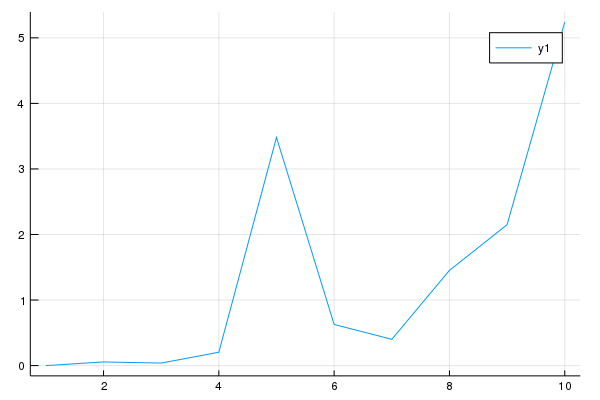

In [11]:
# poor style
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2 # squaring the result
    end
    return ϵ
end

data = generatedata(10)
plot(data)

Here

- `function` is a Julia keyword that indicates the start of a function definition  
- `generatedata` is an arbitrary name for the function  
- `return` is a keyword indicating the return value, as is often unnecessary  


Let us make this example slightly better by “remembering” that `randn` can return a vectors

In [12]:
# still poor style
function generatedata(n)
    ϵ = randn(n) # use built in function

    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2 # squaring the result
    end

    return ϵ
end
data = generatedata(5)

5-element Array{Float64,1}:
 1.4230409762557055  
 0.7557153119182389  
 6.294838024943493   
 0.010191739329801091
 1.0523146135992585  

### Broadcasting: the dot `.`

While better, the looping over the `i` index to square the results is difficult to read

Instead of looping, we can **broadcast** the `^2` square function over a vector using a `.`

To be clear, unlike Python, R, and MATLAB (to a lesser extent), the reason to drop the `for` is **not** for performance reasons, but rather because of code clarity

Loops of this sort are at least as efficient as vectorized approach in compiled languages like Julia, so use a for loop if you think it makes the code more clear

In [13]:
# better style
function generatedata(n)
    ϵ = randn(n) # use built in function
    return ϵ.^2
 end
data = generatedata(5)

5-element Array{Float64,1}:
 0.01554813776202652
 0.39608581655469083
 0.1425268078689984 
 0.15198482388043813
 0.298840365164159  

We can even drop the `function` if we define it on a single line

In [14]:
# We can even drop the `function` if we define it on a single line
# good style
generatedata(n) = randn(n).^2
data = generatedata(5)

5-element Array{Float64,1}:
 0.883920704780895  
 1.1616343550454276 
 5.360173874554002  
 0.5205395280325149 
 0.28248004767691315

* Finally, we can broadcast *any* function! 
* The function `^()` is only one case.
* We can broadcast your own user-defined functions as well.

In [15]:
# good style
f(x) = x^2 # our own simple square function
generatedata(n) = f.(randn(n)) # uses broadcast for some function `f`
data = generatedata(5)

5-element Array{Float64,1}:
 0.6417826718260967 
 1.1406561923225504 
 0.09673569567611903
 0.01709815982609456
 0.5729968397123124 

As a final – abstract – approach, we can make the `generatedata` function able to generically apply to a function

In [16]:
generatedata(n, gen) = gen.(randn(n)) # uses broadcast for some function `gen`

f(x) = x^2 # simple square function
data = generatedata(5, f) # applies f

5-element Array{Float64,1}:
 1.0156204294429663 
 1.8330105131389427 
 0.05421641714575636
 0.03797531496440243
 0.5209252767073038 

Whether this example is better or worse than the previous version depends on how it is used

High degrees of abstraction and generality, e.g. passing in a function `f` in this case, can make code either clearer or more confusing, but Julia enables you to use these techniques **with no performance overhead**

For this particular case, the clearest and most general solution is probably the simplest

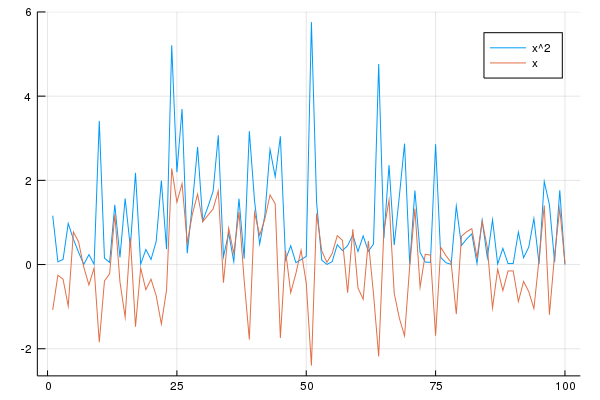

In [17]:
# direct solution with broadcasting, and small user-defined function
n = 100
f(x) = x^2

x = randn(n)
plot(f.(x), label="x^2")
plot!(x, label="x") # layer on the same plot

While broadcasting above superficially looks like vectorizing functions in MATLAB, or Python ufuncs, it is much richer and built on core foundations of the language

The other additional function `plot!` adds a graph to the existing plot

This follows a general convention in Julia, where a function that modifies the arguments or a global state has a `!` at the end of its name

#### A Slightly More Useful Function

Let’s make a slightly more useful function

This function will be passed in a choice of probability distribution and respond by plotting a histogram of observations

In doing so we’ll make use of the `Distributions` package, which we assume was instantiated above with the project

Here’s the code

┌ Info: Recompiling stale cache file /Users/florian.oswald/.julia/compiled/v1.1/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1184


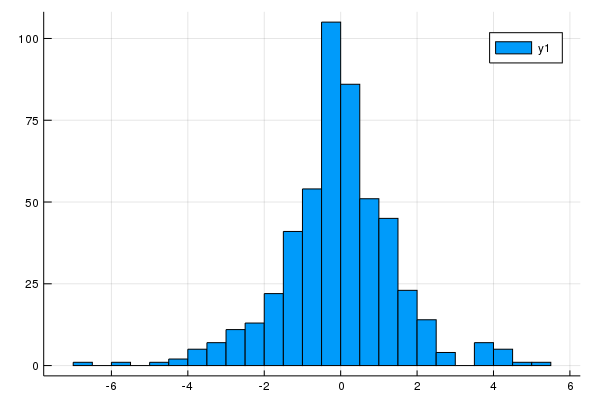

In [18]:
using Distributions

function plothistogram(distribution, n)
    ϵ = rand(distribution, n)  # n draws from distribution
    histogram(ϵ)
end

lp = Laplace()  # an "instance" of a Distribution type. More on this later!
plothistogram(lp, 500)

Let’s have a casual discussion of how all this works while leaving technical details for later in the lectures:

1. `lp = Laplace()` creates an instance of a data type defined in the `Distributions` module that represents the Laplace distribution
2. The name `lp` is bound to this value
3. When we make the function call `plothistogram(lp, 500)` the code in the body of the function `plothistogram` is run with
    - the name `distribution` bound to the same value as `lp`  
    - the name `n` bound to the integer `500`  

### Here's a Mystery

Now consider the function call `rand(distribution, n)`:

* This looks like something of a mystery, doesn't it?
* The function `rand()` is defined in the base library such that `rand(n)` returns `n` uniform random variables on $ [0, 1) $:

In [19]:
rand(3)

3-element Array{Float64,1}:
 0.789725263140602 
 0.9528221623551347
 0.7098109282882887

On the other hand, we just heard that `distribution` points to a data type representing the Laplace distribution that has been defined in a third party package.

>So how can it be that `rand()` is able to take this kind of value as an argument and return the output that we want?

The answer in a nutshell is **multiple dispatch**, which Julia uses to implement **generic programming**.

* This refers to the idea that functions in Julia can have different behavior depending on the particular arguments that they’re passed.
* Hence in Julia we can take an existing function and give it a new behavior by defining how it acts on a new type of value
* The compiler knows which function definition to apply to in a given setting by looking at the types of the values the function is called on
* In Julia these alternative versions of a function are called **methods**

## Example: Variations on Fixed Points

Take a mapping $ f : X \to X $ for some set $ X $

If there exists an $ x^* \in X $ such that $ f(x^*) = x^* $, then $ x^* $: is called a “fixed point” of $ f $

For our second example, we will start with a simple example of determining fixed points of a function

The goal is to start with code in a MATLAB style, and move towards a more **Julian** style with high mathematical clarity

### Fixed Point Maps

Consider the simple equation, where the scalars $ p,\beta $ are given, and  $ v $ is the scalar we wish to solve for

$$
v = p + \beta v
$$

Of course, in this simple example, with parameter restrictions this can be solved as $ v = p/(1 - \beta) $

Rearrange the equation in terms of a map $ f(x) : \mathbb R \to \mathbb R $


<a id='equation-fixed-point-map'></a>
$$
v = f(v) \tag{1}
$$

where

$$
f(v) := p + \beta v
$$

Therefore, a fixed point $ v^* $ of $ f(\cdot) $ is a solution to the above problem, i.e. the value $v^*$ which makes this equation hold.

### While Loops

One approach to finding a fixed point of [(1)](#equation-fixed-point-map) is to start with an initial value, and iterate the map


<a id='equation-fixed-point-naive'></a>
$$
v^{n+1} = f(v^n) \tag{2}
$$

For this exact `f` function,  we can see the convergence to $ v = p/(1-\beta) $ when $ |\beta| < 1 $ by iterating backwards and taking $ n\to\infty $

$$
v^{n+1} = p + \beta v^n = p + \beta p + \beta^2 v^{n-1} = p \sum_{i=0}^{n-1} \beta^i + \beta^n v_0
$$

To implement the iteration in [(2)](#equation-fixed-point-naive), we start by solving this problem with a `while` loop

The syntax for the while loop contains no surprises, and looks nearly identical to a MATLAB implementation:

In [20]:
# poor style
p = 1.0 # note 1.0 rather than 1
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8 # initial condition

# setup the algorithm
v_old = v_iv
normdiff = Inf
iter = 1
while normdiff > tolerance && iter <= maxiter
    v_new = p + β * v_old # the f(v) map
    normdiff = norm(v_new - v_old)  # "size" of a vector in some space

    # replace and continue
    v_old = v_new
    iter = iter + 1
end
println("Fixed point = $v_old, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


The `while` loop, like the `for` loop should only be used directly in Jupyter or the inside of a function

Here, we have used the `norm` function (from the `LinearAlgebra` base library) to compare the values

The other new function is the `println` with the string interpolation, which splices the value of an expression or variable prefixed by `$` into a string

An alternative approach is to use a `for` loop, and check for convergence in each iteration

In [21]:
# setup the algorithm
v_old = v_iv
normdiff = Inf
iter = 1
for i in 1:maxiter
    v_new = p + β * v_old # the f(v) map
    normdiff = norm(v_new - v_old)
    if normdiff < tolerance # check convergence
        iter = i
        break # converged, exit loop
    end
    # replace and continue
    v_old = v_new
end
println("Fixed point = $v_old, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999081896231, and |f(x) - x| = 9.181037796679448e-8 in 154 iterations


### Using a Function

The first problem with this setup is that it depends on being sequentially run – which can be easily remedied with a function

In [22]:
# better, but still poor style
function v_fp(β, ρ, v_iv, tolerance, maxiter)
    # setup the algorithm
    v_old = v_iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        v_new = p + β * v_old # the f(v) map
        normdiff = norm(v_new - v_old)

        # replace and continue
        v_old = v_new
        iter = iter + 1
    end
    return (v_old, normdiff, iter) # returns a tuple
end

# some values
p = 1.0 # note 1.0 rather than 1
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # initial condition

v_star, normdiff, iter = v_fp(β, p, v_initial, tolerance, maxiter)
println("Fixed point = $v_star, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


### Passing a Function

The chief issue is that the algorithm (finding a fixed point) is reusable and generic, while the function we calculate `p + β * v` is specific to our problem

A key feature of languages like Julia, is the ability to efficiently handle functions passed to other functions

In [23]:
# better style
function fixedpointmap(f, iv, tolerance, maxiter)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

# define a map and parameters
p = 1.0
β = 0.9
f(v) = p + β * v # note that p and β are used in the function!

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # initial condition

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


Much better (closer to math), but there are still hidden bugs if the user orders the settings or returns types wrong

### Named Arguments and Return Values

To enable this, Julia has two features:  named function parameters, and named tuples

In [24]:
# good style
function fixedpointmap(f; iv, tolerance=1E-7, maxiter=1000)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # A named tuple
end

# define a map and parameters
p = 1.0
β = 0.9
f(v) = p + β * v # note that p and β are used in the function!

sol = fixedpointmap(f, iv=0.8, tolerance=1.0E-8) # don't need to pass
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter)"*
        " iterations")

Fixed point = 9.999999918629035, and |f(x) - x| = 9.041219328764782e-9 in 177 iterations


In this example, all function parameters after the `;` in the list, must be called **by name**.

Furthermore, a default value may be enabled – so the named parameter `iv` is required while `tolerance` and `maxiter` have default values.

The return type of the function also has named fields, `value, normdiff,` and `iter` – all accessed intuitively using `.`

To show the flexibilty of this code, we can use it to find a fixed point of the non-linear logistic equation, $ x = f(x) $ where $ f(x) := r x (1-x) $

In [25]:
r = 2.0
f(x) = r * x * (1 - x)

sol = fixedpointmap(f, iv=0.8)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 0.4999999999999968, and |f(x) - x| = 3.979330237546819e-8 in 7 iterations


### Using a Package

But best of all is to avoid writing code altogether

In [26]:
# best style
using NLsolve

p = 1.0
β = 0.9
f(v) = p .+ β * v # broadcast the +
sol = fixedpoint(f, [0.8])
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

┌ Info: Recompiling stale cache file /Users/florian.oswald/.julia/compiled/v1.1/NLsolve/KFCNP.ji for NLsolve [2774e3e8-f4cf-5e23-947b-6d7e65073b56]
└ @ Base loading.jl:1184


Fixed point = [10.0], and |f(x) - x| = 3.552713678800501e-15 in 3 iterations


The `fixedpoint` function from the `NLsolve.jl` library implements the simple fixed point iteration scheme above

Since the `NLsolve` library only accepts vector based inputs, we needed to make the `f(v)` function broadcast on the `+` sign, and pass in the initial condition as a vector of length 1 with `[0.8]`

While a key benefit of using a package is that the code is clearer, and the implementation is tested, by using an orthogonal library we also enable performance improvements

In [27]:
# best style
p = 1.0
β = 0.9
iv = [0.8]
sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [10.0], and |f(x) - x| = 3.552713678800501e-15 in 3 iterations


Note that this completes in `3` iterations vs `177` for the naive fixed point iteration algorithm

Since Anderson iteration is doing more calculations in an iteration,  whether it is faster or not would depend on the complexity of the `f` function

But this demonstrates the value of keeping the math separate from the algorithm, since by decoupling the mathematical definition of the fixed point from the implementation in [(2)](#equation-fixed-point-naive), we were able to exploit new algorithms for finding a fixed point

### Anonymous Functions

The only other change in this function is the move from directly defining `f(v)` and using an **anonymous** function

Similar to anonymous functions in MATLAB, and lambda functions in Python, Julia enables the creation of small functions without any names

The code `v -> p .+ β * v` defines a function of a dummy argument, `v` with the same body as our `f(x)`

### Composing Packages

A key benefit of using Julia is that you can compose various packages, types, and techniques, without making changes to your underlying source

As an example, consider if we want to solve the model with a higher-precision, as floating points cannot be distinguished beyond the machine epsilon for that type (recall that computers approximate real numbers to the nearest binary  of a given precision; the *machine epsilon* is the smallest nonzero magnitude)

In Julia, this number can be calculated as

In [28]:
eps()

2.220446049250313e-16

For many cases, this is sufficient precision – but consider that in iterative algorithms applied millions of times, those small differences can add up

The only change we will need to our model in order to use a different floating point type is to call the function with an arbitrary precision floating point, `BigFloat`, for the initial value

In [ ]:
# use arbitrary precision floating points
p = 1.0
β = 0.9
iv = [BigFloat(0.8)] # higher precision

# otherwise identical
sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Here, the literal `BigFloat(0.8)` takes the number `0.8` and changes it to an arbitrary precision number

The result is that the residual is now **exactly** `0.0` since it is able to use arbitrary precision in the calculations, and the solution has a finite-precision solution with those parameters

### Multivariate Fixed Point Maps

The above example can be extended to multivariate maps without any modifications to the fixed point iteration code

Using our own, homegrown iteration and simply passing in a bivariate map:

In [ ]:
p = [1.0, 2.0]
β = 0.9
iv = [0.8, 2.0]
f(v) = p .+ β * v # note that p and β are used in the function!

sol = fixedpointmap(f, iv = iv, tolerance = 1.0E-8)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter)"*
"iterations")

This also works without any modifications with the `fixedpoint` library function

In [ ]:
using NLsolve

p = [1.0, 2.0, 0.1]
β = 0.9
iv =[0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Finally, to demonstrate the importance of composing different libraries, use a `StaticArrays.jl` type, which provides an efficient implementation for small arrays and matrices

In [ ]:
using NLsolve, StaticArrays
p = @SVector [1.0, 2.0, 0.1]
β = 0.9
iv = @SVector  [0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

The `@SVector` in front of the `[1.0, 2.0, 0.1]` is a macro for turning a vector literal into a static vector

All macros in Julia are prefixed by `@` in the name, and manipulate the code prior to compilation

We will see a variety of macros, and discuss the “metaprogramming” behind them in a later lecture